<a href="https://colab.research.google.com/github/xYeshu/Eye-Controlled-Mouse/blob/main/COLOR_EXTRACTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#get colors from an image
from PIL import Image
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

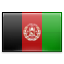

In [47]:
#code= "XX"
flag_url = 'https://www.countryflagicons.com/SHINY/64/AF.png'
 #'+code+'.png'


original = Image.open(urllib.request.urlopen(flag_url))
original

In [48]:
reduced = original.convert("P", palette=Image.Palette.WEB) # convert to web palette (216 colors)
palette = reduced.getpalette() # get palette as [r,g,b,r,g,b,...]
palette = [palette[3*n:3*n+3] for n in range(256)] # group 3 by 3 = [[r,g,b],[r,g,b],...]
color_count = [(n, palette[m]) for n,m in reduced.getcolors()]
color_count

[(1636, [0, 0, 0]),
 (169, [82, 182, 82]),
 (163, [175, 21, 21]),
 (159, [22, 22, 22]),
 (147, [7, 7, 7]),
 (131, [14, 138, 14]),
 (129, [208, 87, 86]),
 (121, [38, 38, 38]),
 (120, [39, 152, 39]),
 (115, [71, 71, 71]),
 (98, [87, 87, 87]),
 (82, [24, 146, 24]),
 (80, [55, 55, 55]),
 (76, [55, 167, 55]),
 (74, [208, 102, 101]),
 (71, [202, 73, 73]),
 (62, [179, 38, 38]),
 (60, [0, 0, 0]),
 (44, [2, 123, 2]),
 (42, [67, 173, 67]),
 (40, [101, 101, 101]),
 (37, [212, 151, 141]),
 (35, [207, 120, 112]),
 (28, [220, 130, 129]),
 (25, [14, 88, 14]),
 (22, [96, 190, 96]),
 (20, [117, 28, 28]),
 (20, [107, 195, 107]),
 (20, [156, 0, 0]),
 (19, [206, 135, 118]),
 (18, [128, 128, 128]),
 (18, [149, 149, 149]),
 (18, [128, 204, 128]),
 (18, [149, 212, 149]),
 (18, [215, 164, 151]),
 (16, [195, 57, 57]),
 (14, [15, 101, 15]),
 (14, [235, 179, 179]),
 (12, [182, 50, 50]),
 (10, [33, 138, 33]),
 (9, [216, 182, 175]),
 (8, [188, 70, 67]),
 (8, [190, 87, 82]),
 (7, [188, 71, 61]),
 (7, [199, 104, 89]

In [49]:
RGB_df = pd.DataFrame(color_count, columns = ['cnt', 'RGB']).sort_values(by = 'cnt', ascending = False).iloc[1:4]
RGB_df

,cnt,RGB
1,169,"[82, 182, 82]"
2,163,"[175, 21, 21]"
3,159,"[22, 22, 22]"


In [50]:
RGB = pd.DataFrame(RGB_df['RGB'].to_list(), columns = ['r', 'g', 'b'])
RGB['Total'] = RGB.r + RGB.g + RGB.b
RGB = RGB.sort_values(by=["Total"]).drop(['Total'], axis = 1).reset_index().drop("index",axis =1)
RGB

,r,g,b
0,22,22,22
1,175,21,21
2,82,182,82


In [51]:
number_colors = len(RGB.r)

if number_colors == 2:
    idxs = np.split(RGB.index, 2) #split index
    #add index in place
    RGB.set_index(idxs[0].union(idxs[1] + 1), inplace=True)
    #add row with darker color
    RGB.loc[1] = [1, np.round(255-RGB.r[0]),np.round(255-RGB.g[0]),np.round(255-RGB.b[0])]
else:
    RGB
RGB

,r,g,b
0,22,22,22
1,175,21,21
2,82,182,82


In [52]:
def rgb_to_hex(red, green, blue):
    """Return color as #rrggbb for the given color values."""
    return '#%02x%02x%02x' % (red, green, blue)

RGB['hex'] = RGB.apply(lambda r: rgb_to_hex(*r), axis=1) #convert rgb to hex
color = RGB.hex.to_list()
color

['#161616', '#af1515', '#52b652']

['#161616', '#af1515', '#52b652']


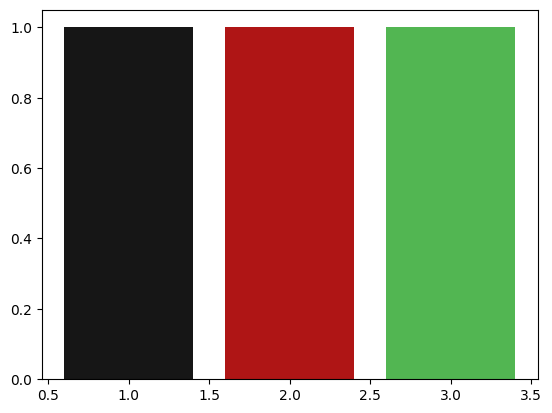

In [53]:
plt.bar([1,2,3], [1,1,1], color = color)

print(color)